# The Spark Foundation-GRIP-Data Science and Business Analytics Intern-
# October 2021 Batch

Author:-Sagar Samadhan Ingale

Level:-Beginner

Language:-Python

Dataset link:-https://bit.ly/3kXTdox

Problem statement:-From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually?


### Importing Required Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ps=pd.read_csv('iris.csv') #Read the csv file of iris dataset and store it into the variable name called ps
ps

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analysis EDA on the dataset 

In [3]:
ps.head() # Display the first five rows of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ps.tail() # Display the last five rows of the data 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
ps.rename(columns={'SepalLengthCm':'SepalLength', 'SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace=True)
# renaming the column name SepalLengthCm as SepalLength , SepalWidthCm as SepalWidth , PetalLengthCm as PetalLength , PetalWidthCm as PetalWidth

In [6]:
ps['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)
# replacing the Iris-virginica by  virginica into the Species Column
# replacing the Iris-setosa by setosa into the Species Column
# replacing the Iris-versicolor by  versicolor into the Species Column


In [7]:
ps=ps.drop("Id", axis=1)
# As the Id column in the iris dataset resembles to the serial number of the rows inserted as it is not necessary for prediction 
# we asre droping the Id column  from the data set

In [8]:
ps.info() # Print the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
ps.shape # shows the shape of the data variable in tuple format
# variable_name(number of rows, number of columns)

(150, 5)

In [10]:
ps.describe() 
# shows the Statistical details

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
ps.isna().sum() # Check for any null value in dataset or not 
# isna().sum() will give the sum of the null values present in the dataset


SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

 ### Data Visualization and Correlation Matrix

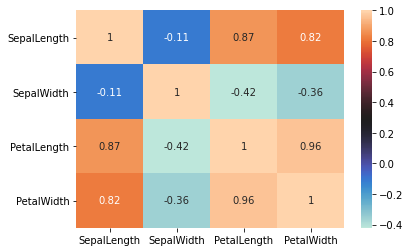

In [14]:
sns.heatmap(ps.corr(),cmap='icefire',annot=True);

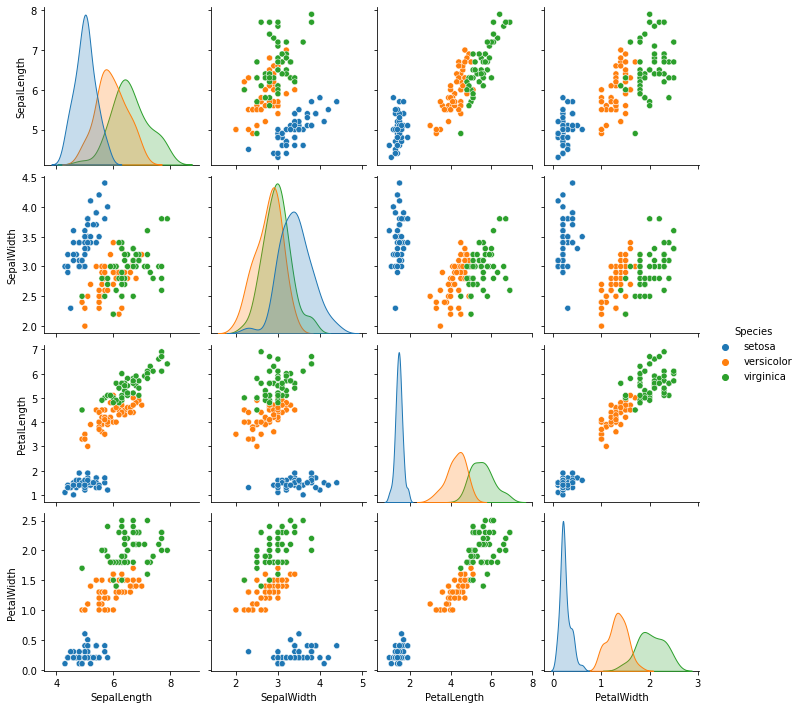

In [16]:
sns.pairplot(ps,hue='Species');
# blue color represents the setosa
# orange color represents the versicolor
# green color represeents the virginica


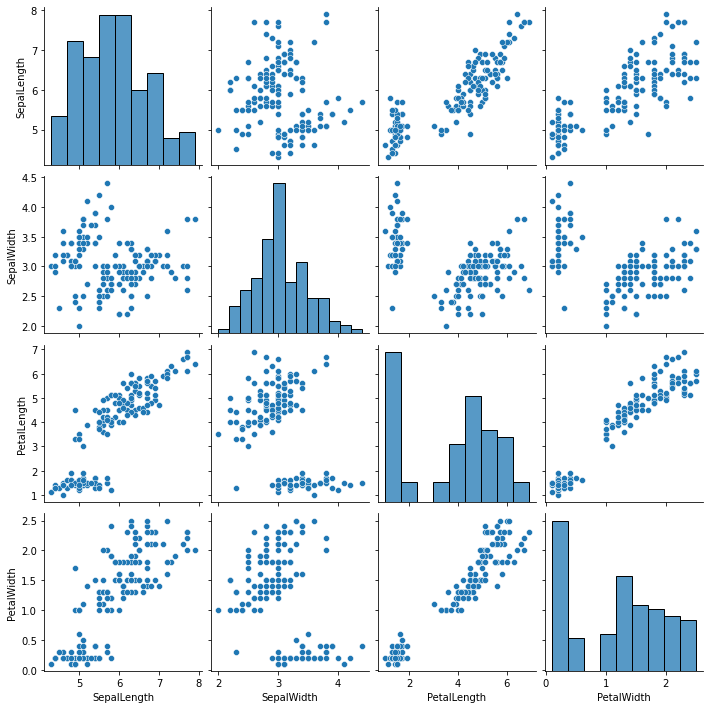

In [20]:
sns.pairplot(ps);

In [21]:
x = ps.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans 
# importing K-means library for un supervised ML Model

wcss=[]

for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plotting The Elbow Graph To Find Optimal Value Of 'K'

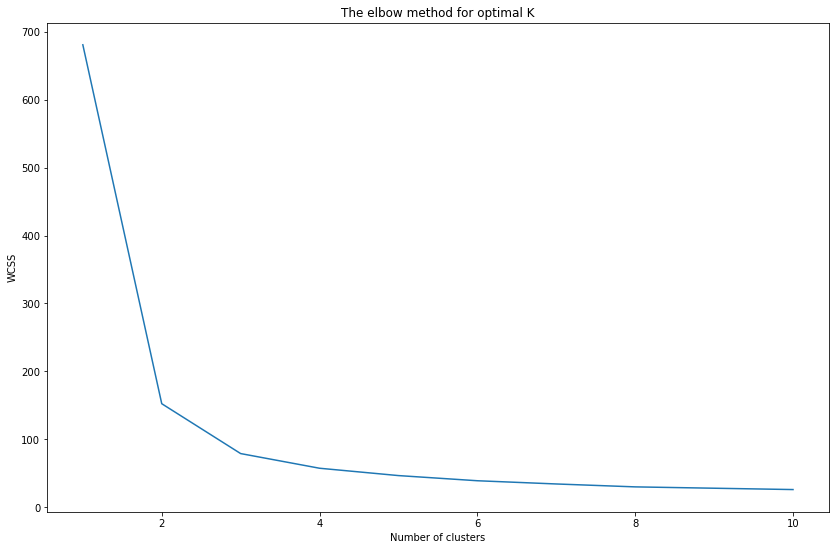

In [23]:
plt.figure(figsize=(14,9))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method for optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### The above Graph 'The elbow method' the optimum clusters is where the elbow occurs.

#### There is a occurance of elbow on to the cluster 2nd and slightly on cluster 3rd

#### After 4th no changes occuring in graph from the cluster 5th to 10th

### Applying K-Means cluster when number of clusters is 5

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=5)
iris_k_model.fit(x)

KMeans(n_clusters=5)

In [25]:
print(iris_k_model.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 4 0 3 4 4 3 1 3 4 3 4
 4 4 0 4 4 4 3 3 0 4 0 3 0 4 3 0 0 4 3 3 3 4 0 0 3 4 4 0 4 4 4 0 4 4 4 0 4
 4 0]


In [26]:
print(iris_k_model.cluster_centers_)

[[6.20769231 2.85384615 4.74615385 1.56410256]
 [5.508      2.6        3.908      1.204     ]
 [5.006      3.418      1.464      0.244     ]
 [7.475      3.125      6.3        2.05      ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]]


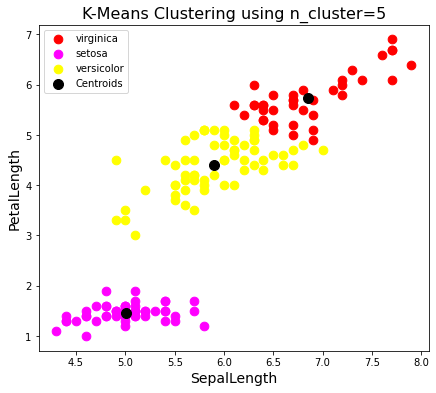

In [42]:
plt.figure(figsize=(7,6))
plt.scatter(ps.iloc[y_kmeans==0,0],ps.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(ps.iloc[y_kmeans==1,0],ps.iloc[y_kmeans==1,2],s=75,c='magenta',label='setosa')
plt.scatter(ps.iloc[y_kmeans==2,0],ps.iloc[y_kmeans==2,2],s=75,c='yellow',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('SepalLength',fontsize=14)
plt.ylabel('PetalLength',fontsize=14)
plt.title('K-Means Clustering using n_cluster=5',fontsize=16);

### Applying K-Means cluster when number of clusters is 4

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=4)
iris_k_model.fit(x)

KMeans(n_clusters=4)

In [32]:
print(iris_k_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 2 2 2 2 3 2 2 2 1
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 1
 2 1]


In [33]:
print(iris_k_model.cluster_centers_)

[[5.006      3.418      1.464      0.244     ]
 [6.2525     2.855      4.815      1.625     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.53214286 2.63571429 3.96071429 1.22857143]]


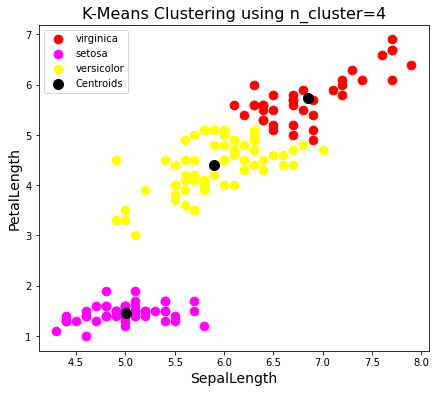

In [43]:
plt.figure(figsize=(7,6))
plt.scatter(ps.iloc[y_kmeans==0,0],ps.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(ps.iloc[y_kmeans==1,0],ps.iloc[y_kmeans==1,2],s=75,c='Magenta',label='setosa')
plt.scatter(ps.iloc[y_kmeans==2,0],ps.iloc[y_kmeans==2,2],s=75,c='yellow',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('SepalLength',fontsize=14)
plt.ylabel('PetalLength',fontsize=14)
plt.title('K-Means Clustering using n_cluster=4',fontsize=16);

### Applying K-Means cluster when number of clusters is 3

In [37]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=3)
iris_k_model.fit(x)

KMeans(n_clusters=3)

In [38]:
print(iris_k_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [39]:
print(iris_k_model.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


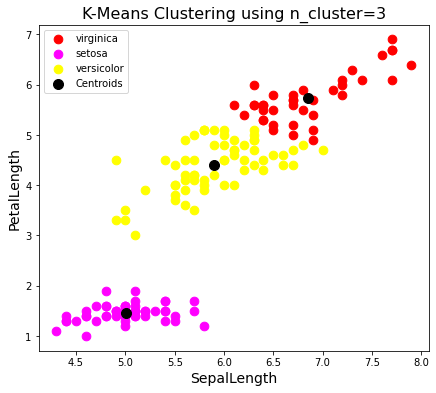

In [47]:
plt.figure(figsize=(7,6))
plt.scatter(ps.iloc[y_kmeans==0,0],ps.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(ps.iloc[y_kmeans==1,0],ps.iloc[y_kmeans==1,2],s=75,c='Magenta',label='setosa')
plt.scatter(ps.iloc[y_kmeans==2,0],ps.iloc[y_kmeans==2,2],s=75,c='yellow',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('SepalLength',fontsize=14)
plt.ylabel('PetalLength',fontsize=14)
plt.title('K-Means Clustering using n_cluster=3',fontsize=16);

## Conclusion:-

### After plotting the all the three graph with cluster 5th,4th,3rd,The cluster with 3rd is a much better in cluster formation as compared to 4th and 5th clusters

### Thank you